In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
books = []
for i in range (1, 51):
    url = f'https://books.toscrape.com/catalogue/page-{i}.html'
    response = requests.get(url)
    response = response.content
    soup = BeautifulSoup(response, 'html.parser')
    ol = soup.find('ol')
    articles = ol.find_all('article', class_ = 'product_pod')

    for article in articles:
        image = article.find('img')
        title = image.attrs['alt']
        star = article.find('p')
        star = star['class'][1]
        price = article.find('p', class_ = 'price_color').text
        price = float(price[1:])
        books.append([title, price, star])


In [5]:
df = pd.DataFrame (books, columns=['Title', 'Price', 'Star Rating'])

In [6]:
df.head()

,Title,Price,Star Rating
0,A Light in the Attic,51.77,Three
1,Tipping the Velvet,53.74,One
2,Soumission,50.10,One
3,Sharp Objects,47.82,Four
4,Sapiens: A Brief History of Humankind,54.23,Five


In [42]:
df.to_csv('books.csv')

<h2> Exploratory Data Analysis

Checking for Null Values

In [12]:
df.isnull().sum()

Title          0
Price          0
Star Rating    0
dtype: int64

Total Books

In [11]:
df['Title'].nunique()

999

Average Price

In [15]:
average_price = df["Price"].mean()
average_price

35.07035

Top 5 Most Expensive Books

In [7]:
top_book_sales = pd.DataFrame(df.groupby('Title')['Price'].sum().sort_values(ascending = False).reset_index()).head(5)

In [8]:
top_book_sales

,Title,Price
0,The Star-Touched Queen,78.32
1,The Perfect Play (Play by Play #1),59.99
2,Last One Home (New Beginnings #1),59.98
3,Civilization and Its Discontents,59.95
4,The Barefoot Contessa Cookbook,59.92


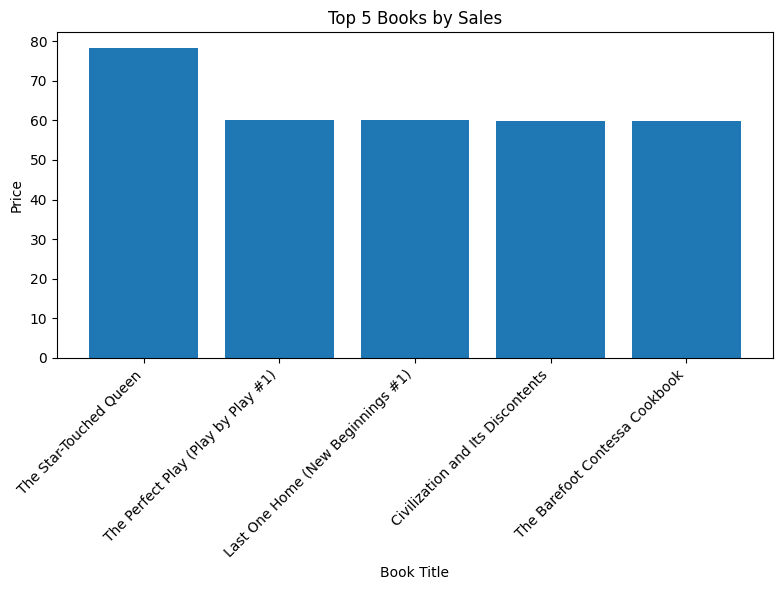

In [10]:
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.bar(top_book_sales['Title'], top_book_sales['Price'])
plt.xlabel('Book Title')
plt.ylabel('Price')
plt.title('Top 5 Books by Sales')
plt.xticks(rotation=45, ha='right')  # Rotate book titles for better readability

# Display the chart
plt.tight_layout()
plt.show()

Rating Distribution

In [43]:
rating_dist = df['Star Rating'].value_counts(normalize=True)*100

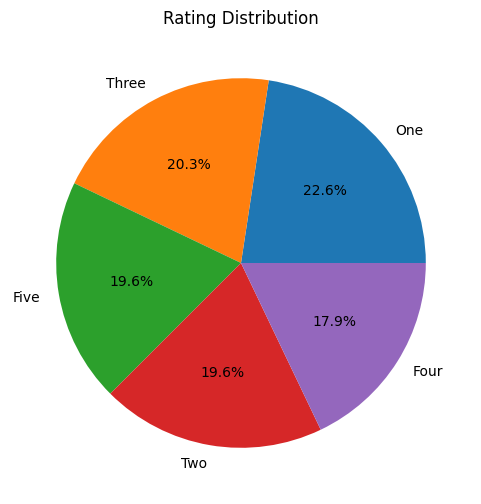

In [49]:
plt.figure(figsize=(6, 6))
plt.pie(rating_dist, labels=rating_dist.index, autopct="%1.1f%%")
plt.title("Rating Distribution")
plt.show()